<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/Machine-Learning/blob/main/ML/classes/class_march_3/class_march_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Constuir un clasificador binario unos versus dos utilizando el dataset `mnist_784`

## Modelos para la selección:  

* RandomForestClassifier

## Metodología de Géron

Para ello siga la metodología dada por Aurelien Géron:

1. Obtener el dataset y configurarlo en la forma estándar $[X \mid y]$ y para el clasificador binario de unos versus dos que se le asignó. Donde los valores de las entradas de estas matrices sea de tipo `int64`.  

2. Descomponer a `X` y a `y` en `X_12_train`, `X_12_test`, `y_12_train` y  
  `y_12_test` con una tasa de testeo del 20%.   
   Y verificar con histogramas que el muestreo sea estratificado. 

3. Escale los atributos con la estrategia de estandarización para obtener `X_train_1_vs_2_escalado` y `X_test_1_vs_2_escalado`. 

4. Entrene los modelos asignados con los datos escalados `X_train_1_vs_2_escalado` y las etiquetas de entrenamiento `y_train_1_vs_2`. 

5. ¿Es aplicable la medida de desempeño `accuracy` para su tarea de clasificación?. Justifique su respuesta. 

6. Efectue el proceso de validación cruzada con 5 hojas de validación (`cv = 5`) y con el `scoring = `accuracy`.   

7. Determine la matriz de confusión utilizando 5 hojas de validación.  

8. Determine la precisión y el recall de su clasificador para las mismas 5 hojas de validación.  

9. Determine el puntaje f1 de su clasificador para las mismas 5 hojas de validación. 

10. Utilice el `method="decision_function"` de la función `cross_val_predict()` para determinar el vector `y_train_1_vs_2_scores` de los puntajes de decisión para los modelos lineales que le hayan asignado. 

11. Utilice `precision_recall_curve` para determinar el umbral de decisión necesario para obtener una precisión del 90 $\%$ en su clasificador. 

12. Utilice la función `roc_curve` del módulo `metrics` de sklearn para trazar la curva ROC de su modelo. Para ello evalue la función `roc_curve` en `y_train_1_vs_2`, y  `y_train_1_vs_2_scores`).

13. Determine el área bajo la curva ROC utilizando la función `roc_auc_score` del módulo metrics de Sklearn. 

# Solución del parcial

1. Obtener el dataset y configurarlo en la forma estándar $[X \mid y]$ y para el clasificador binario de unos versus dos que se le asignó. Donde los valores de las entradas de estas matrices sea de tipo `int64`.  

In [1]:
%%time 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame = False) 
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

*** unos versus dos ***

In [2]:
import numpy as np 

In [3]:
X,y = mnist['data'], mnist['target'] 

In [4]:
y = y.astype(np.int64)

In [5]:
np.info(X,y)


class:  ndarray
shape:  (70000, 784)
strides:  (8, 560000)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x239b523d040
byteorder:  little
byteswap:  False
type: float64


In [6]:
X_clase_1 = X[y == 1]
X_clase_2 = X[y == 2]


In [7]:
y_clase_1 = np.ones(X_clase_1.shape[0]) 
y_clase_2 = np.zeros(X_clase_2.shape[0]) 



In [13]:
X_12 = np.vstack((X_clase_1, X_clase_2)) 
y_12 = np.hstack((y_clase_1, y_clase_2)) 


*Lo felicito por la configuración del dataset para la clasificación binaria de unos y dos*

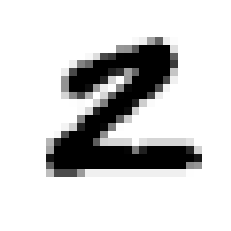

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

primer_digito = X_binaria[8000] 

primer_digito_imagen = primer_digito.reshape(28, 28)

plt.imshow(primer_digito_imagen, cmap="binary")

plt.axis("off")

plt.savefig('un digito.jpg')

plt.show()


*Buena visualización del dataset*

In [16]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split( X_12, y_12, \
                                                   test_size=0.20, \
                                                   random_state=42,\
                                                  stratify = y_12)

*Le recomiendo muestreo estratificado para dataset pequeños*

In [17]:
print('Train Data: ', X_train, '\n', 'Test Data:', X_test, '\n',
      'Train label: ', y_train, '\n', 'Test Label: ', y_test)

Train Data:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 Test Data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 Train label:  [1. 0. 0. ... 0. 1. 1.] 
 Test Label:  [0. 1. 1. ... 0. 0. 1.]


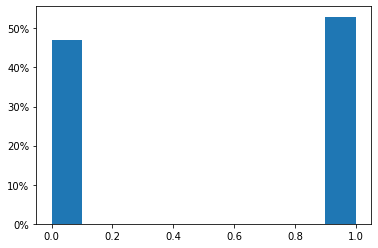

In [18]:
from matplotlib.ticker import PercentFormatter

plt.hist(y_train, weights=np.ones(len(y_train)) / len(y_train))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

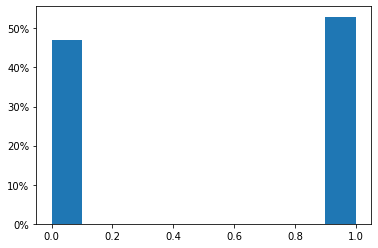

In [19]:
plt.hist(y_test, weights=np.ones(len(y_test)) / len(y_test))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

*Lo felicito por la verificación del muestreo estratificado*

# Preprocesamiento de datos

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [21]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
X_train_1_vs_2_escalado=scaler.transform(X_train)

In [ ]:

X_test_1_vs_2_escalado =scaler.transform(X_test)

In [ ]:
##Entrenamos el modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

In [ ]:
models = []
models.append(['Random Forest', RandomForestClassifier(random_state=42)])
lst_1= []
for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_1_vs_2_escalado, y_train)
    y_pred = model.predict(X_test_1_vs_2_escalado)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_1_vs_2_escalado, y = y_train, cv = 5)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

La validación cruzada con la medida de desempeño de la exactitud

In [ ]:
##Efectue el proceso de validación cruzada con 5 hojas de validación (cv = 5) y con el scoring =accuracy`. 
score = cross_val_score(estimator = model, X = X_train, y = y_train, \
                        cv = 5,scoring="accuracy")   
##Validation
  


In [ ]:
score

 10 .Utilice el method="decision_function" de la función cross_val_predict() para determinar el vector y_train_1_vs_2_scores de los puntajes de decisión para los modelos lineales que le hayan asignado. 

In [ ]:
##Puntajes de decisión
threshold = 8000


In [ ]:
from sklearn.model_selection import cross_val_predict 
y_scores = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")


In [ ]:
y_scores 

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:,1])

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores[:,1])